In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve,auc, precision_recall_curve, accuracy_score, roc_auc_score, ConfusionMatrixDisplay



# Tree Visualisation
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import pydotplus



In [ ]:
df = pd.read_csv(f'/content/drive/Shareddrives/GWAR/final_final.tsv', sep='\t')
df.head()

,edited,is_self,num_comments,over_18,score,Price_change,archived_0.0,archived_1.0,archived_,can_gild_0.0,...,subreddit_id_t5_2qjfk,subreddit_type_,subreddit_type_public,title_TfidfVectorizer(stop_words='english'),whitelist_status_,whitelist_status_all_ads,whitelist_status_promo_adult_nsfw,wls_3.0,wls_6.0,wls_
0,0,True,3,False,3,-1,False,True,False,True,...,True,False,True,True,False,True,False,False,False,True
1,0,False,0,False,0,1,False,True,False,False,...,True,False,True,True,False,True,False,False,False,True
2,0,False,0,False,1,-1,False,True,False,False,...,True,False,True,True,False,True,False,False,False,True
3,0,False,0,False,1,1,False,True,False,False,...,True,False,True,True,False,True,False,False,False,True
4,0,False,0,False,3,-1,False,True,False,False,...,True,False,True,True,False,True,False,False,False,True


In [ ]:
df.columns

Index(['edited', 'is_self', 'num_comments', 'over_18', 'score', 'Price_change',
       'archived_0.0', 'archived_1.0', 'archived_', 'can_gild_0.0',
       'can_gild_1.0', 'can_gild_', 'gilded_0.0', 'gilded_1.0', 'gilded_2.0',
       'gilded_3.0', 'gilded_4.0', 'gilded_5.0', 'gilded_7.0', 'gilded_',
       'is_crosspostable_0.0', 'is_crosspostable_1.0', 'is_crosspostable_',
       'link_flair_richtext_', 'link_flair_richtext_[]',
       'link_flair_richtext_[{'e': 'text', 't': 'Advice Request'}]',
       'link_flair_richtext_[{'e': 'text', 't': 'Advice'}]',
       'link_flair_richtext_[{'e': 'text', 't': 'Discussion'}]',
       'link_flair_richtext_[{'e': 'text', 't': 'News'}]',
       'link_flair_richtext_[{'e': 'text', 't': 'Off-Topic'}]',
       'link_flair_richtext_[{'e': 'text', 't': 'Question'}]',
       'link_flair_richtext_[{'e': 'text', 't': 'Ticker Discussion'}]',
       'link_flair_richtext_[{'e': 'text', 't': 'Ticker News'}]',
       'link_flair_richtext_[{'e': 'text', 't': 

In [ ]:
df['Price_change']

0       -1
1        1
2       -1
3        1
4       -1
        ..
15997    1
15998    1
15999    1
16000    1
16001    1
Name: Price_change, Length: 16002, dtype: int64

In [ ]:
# split the data into features and Target Variable

X = df.drop('Price_change',axis = 1)
y = df['Price_change']

In [ ]:
# Splitting data into training and remaining data (60% training, 40% remaining)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Splitting remaining data into testing and validation sets (20% testing, 20% validation)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

In [ ]:
X_train.shape, X_test.shape, X_val.shape

((9601, 75), (3200, 75), (3201, 75))

In [ ]:
# Training random forest with default parameters on training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predicting on the test data
y_test_pred = model.predict(X_test)

# Predicting on the Validation data
y_val_pred = model.predict(X_val)

In [ ]:
# Base Model Test data accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy of base Random Forest model for test dataset: %.2f%%" % (test_accuracy*100))

# Base Model Validation data accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy of base Random Forest model for validation dataset: %.2f%%" % (val_accuracy*100))


Accuracy of base Random Forest model for test dataset: 54.25%
Accuracy of base Random Forest model for validation dataset: 54.73%


<Figure size 640x480 with 0 Axes>

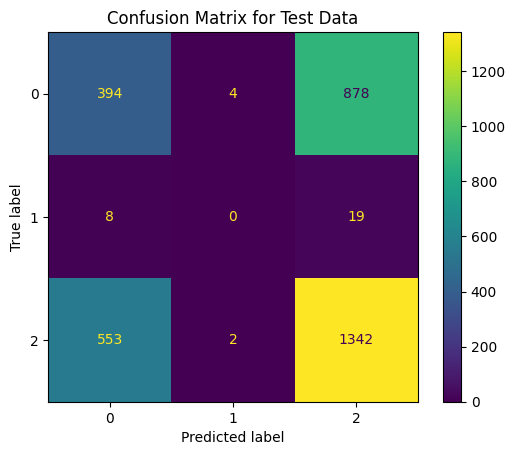

In [ ]:
# Base Model Confusion matrix for test dataset
rf_test_cf = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix with a title
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=rf_test_cf)
disp.plot()
plt.title('Confusion Matrix for Test Data')  # Adding a title
plt.show()

<Figure size 640x480 with 0 Axes>

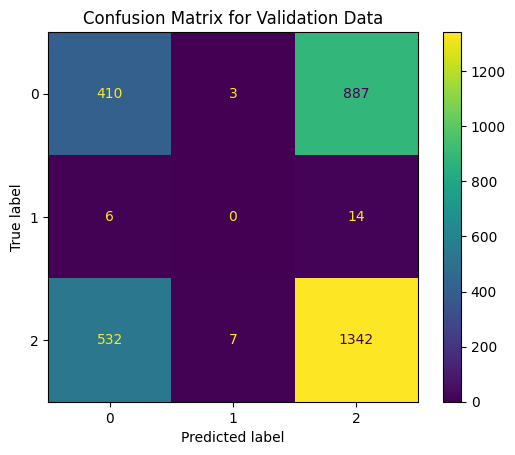

In [ ]:
# Base Model Confusion matrix for validation dataset
rf_val_cf = confusion_matrix(y_val, y_val_pred)

# Plotting the confusion matrix with a title
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=rf_val_cf)
disp.plot()
plt.title('Confusion Matrix for Validation Data')  # Adding a title
plt.show()

In [ ]:
# Classification report for test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))



Test Set Classification Report:
              precision    recall  f1-score   support

          -1       0.41      0.31      0.35      1276
           0       0.00      0.00      0.00        27
           1       0.60      0.71      0.65      1897

    accuracy                           0.54      3200
   macro avg       0.34      0.34      0.33      3200
weighted avg       0.52      0.54      0.53      3200



In [ ]:
# Classification report for validation set
print("\nValidation Set Classification Report:")
print(classification_report(y_val, y_val_pred,zero_division=0))




Validation Set Classification Report:
              precision    recall  f1-score   support

          -1       0.43      0.32      0.36      1300
           0       0.00      0.00      0.00        20
           1       0.60      0.71      0.65      1881

    accuracy                           0.55      3201
   macro avg       0.34      0.34      0.34      3201
weighted avg       0.53      0.55      0.53      3201



In [ ]:
# Getting predicted class probabilities for the test set
y_pred_prob_rf_test = model.predict_proba(X_test)


roc_auc_rf_t = roc_auc_score(y_test, y_pred_prob_rf_test, multi_class='ovr')
print(f"ROC AUC Score (One-vs-Rest): {roc_auc_rf_t}")

ROC AUC Score (One-vs-Rest): 0.5230630575332481


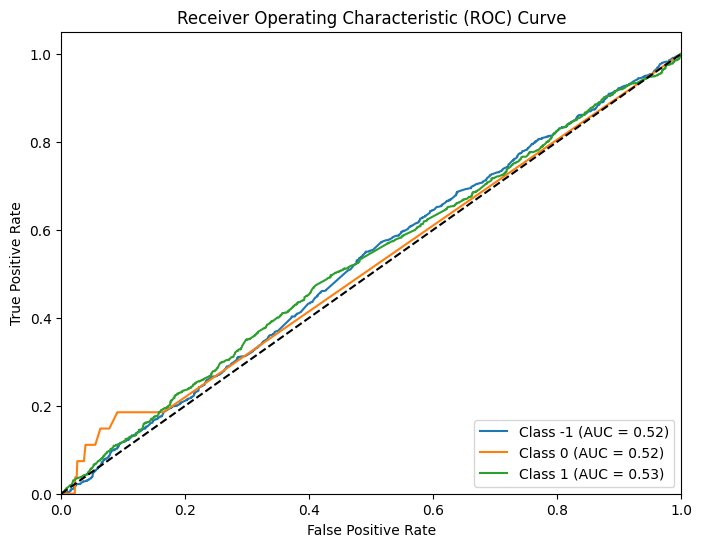

In [ ]:
classes=[-1,0,1]

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
# test_probabilities = best_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob_rf_test[:, i], pos_label=classes[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




In [ ]:
# Getting predicted class probabilities for the Validation set
y_pred_prob_rf_val = model.predict_proba(X_val)


roc_auc_rf_v = roc_auc_score(y_val, y_pred_prob_rf_val, multi_class='ovr')
print(f"ROC AUC Score (One-vs-Rest): {roc_auc_rf_v}")

ROC AUC Score (One-vs-Rest): 0.5252126845883205


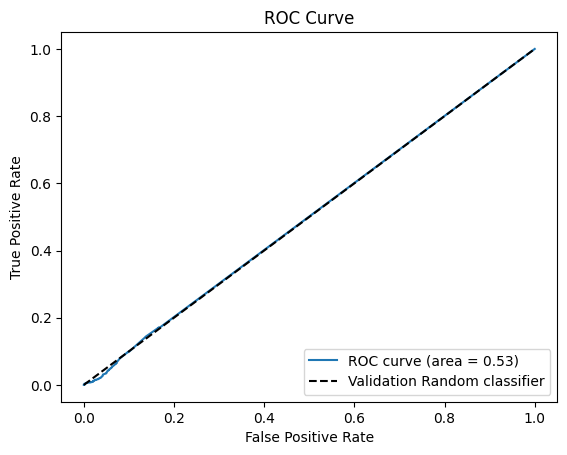

In [ ]:
class_index = 1  # index of the class for which to plot the ROC curve
fpr_v, tpr_v, thresholds = roc_curve(y_val, y_pred_prob_rf_val[:, class_index], pos_label=class_index)

# Plotting the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_v, tpr_v, label=f'ROC curve (area = {roc_auc_rf_v:.2f})')
plt.plot([0, 1], [0, 1], 'k--',label='Validation Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Hyperparameter tuning

rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': np.arange(100, 1001, 50),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None] + list(np.arange(5, 51, 5)),  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Define the RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Use the best estimator to make test predictions
test_predictions = random_search.predict(X_test)

# Use the best estimator to make validation predictions
val_predictions = random_search.predict(X_val)

# Tuned Model Test data accuracy
best_testaccuracy = accuracy_score(y_test, test_predictions)
print("Accuracy of Tuned Random Forest model: %.2f%%" % (best_testaccuracy*100))

# Tuned Model Validation data accuracy
best_val_accuracy = accuracy_score(y_val, val_predictions)
print("Accuracy of Tuned Random Forest model: %.2f%%" % (best_val_accuracy*100))

In [ ]:
# Fit the random search model
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'n_estimators': 750, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 15, 'bootstrap': True}
Best score: 0.5878549021139228


In [ ]:
# Use the best estimator to make test predictions
test_predictions = random_search.predict(X_test)

# Use the best estimator to make validation predictions
val_predictions = random_search.predict(X_val)


In [ ]:
# Tuned Model Test data accuracy
best_testaccuracy = accuracy_score(y_test, test_predictions)
print("Accuracy of Tuned Random Forest model: %.2f%%" % (best_testaccuracy*100))

# Tuned Model Validation data accuracy
best_val_accuracy = accuracy_score(y_val, val_predictions)
print("Accuracy of Tuned Random Forest model: %.2f%%" % (best_val_accuracy*100))

Accuracy of Tuned Random Forest model: 59.31%
Accuracy of Tuned Random Forest model: 58.89%


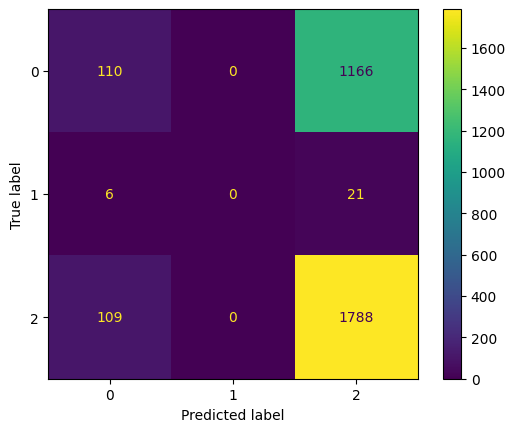

In [ ]:
# Tuned Model Confusion matrix for test dataset
test_cf = confusion_matrix(y_test, test_predictions)
ConfusionMatrixDisplay(confusion_matrix= test_cf).plot()

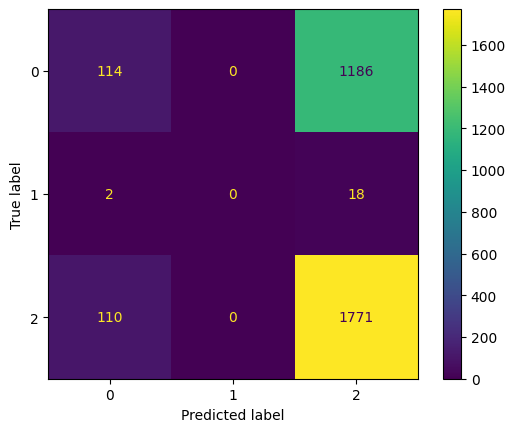

In [ ]:
# Tuned Model Confusion matrix for validation dataset
val_cf = confusion_matrix(y_val, val_predictions)
ConfusionMatrixDisplay(confusion_matrix= val_cf).plot()

In [ ]:
# Tuned Classification report for test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, test_predictions))


Test Set Classification Report:
              precision    recall  f1-score   support

          -1       0.49      0.09      0.15      1276
           0       0.00      0.00      0.00        27
           1       0.60      0.94      0.73      1897

    accuracy                           0.59      3200
   macro avg       0.36      0.34      0.29      3200
weighted avg       0.55      0.59      0.49      3200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Tuned Classification report for Validation set
print("\nTest Set Classification Report:")
print(classification_report(y_val, val_predictions))


Test Set Classification Report:
              precision    recall  f1-score   support

          -1       0.50      0.09      0.15      1300
           0       0.00      0.00      0.00        20
           1       0.60      0.94      0.73      1881

    accuracy                           0.59      3201
   macro avg       0.37      0.34      0.29      3201
weighted avg       0.55      0.59      0.49      3201



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Getting tuned predicted class probabilities for the test set
test_pred_prob = model.predict_proba(X_test)

test_roc_auc = roc_auc_score(y_test, test_pred_prob, multi_class='ovr')
print(f"ROC AUC Score (One-vs-Rest): {test_roc_auc}")

ROC AUC Score (One-vs-Rest): 0.5230630575332481


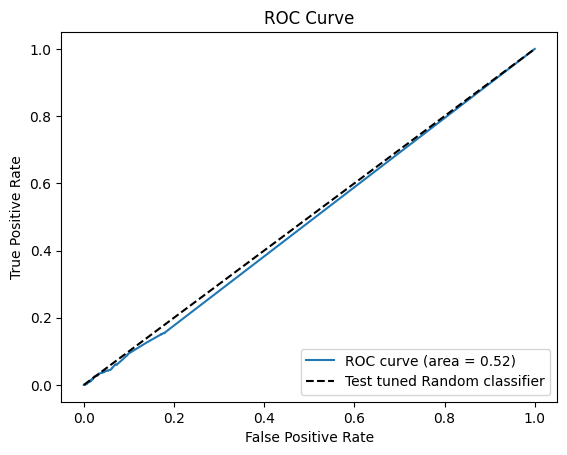

In [ ]:
class_index = 1  # index of the class for which to plot the ROC curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_pred_prob[:, class_index], pos_label=class_index)

# Plotting the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(test_fpr, test_tpr, label=f'ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--',label='Test tuned Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Getting tuned predicted class probabilities for the Validation set
val_pred_prob= model.predict_proba(X_val)

val_roc_auc = roc_auc_score(y_val, val_pred_prob, multi_class='ovr')
print(f"ROC AUC Score (One-vs-Rest): {val_roc_auc}")

ROC AUC Score (One-vs-Rest): 0.5274599587170808


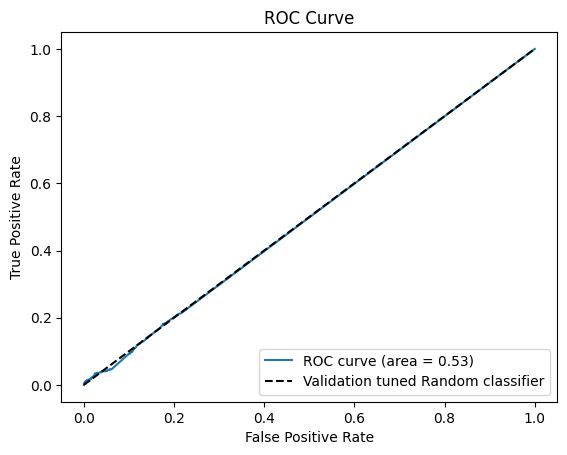

In [ ]:
class_index = 1  # index of the class for which to plot the ROC curve
val_fpr, val_tpr, val_thresholds = roc_curve(y_val, val_pred_prob[:, class_index], pos_label=class_index)

# Plotting the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(val_fpr, val_tpr, label=f'ROC curve (area = {val_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--',label='Validation tuned Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
